### Determine the optimal K number

* This notebook determines the optimal number of K-Means algorithm using Average silhouette method
* 514 features were selected out of the 1063 features
* Three data processing approaches: 
* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Approach I. All variables have been transformed into numerical values using low rank representation method, the reduced dimension matrix is used here to determine optimal K.
* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Approach II. Drop all the categorical values and impute the numerical values with means, the method will be applied on three parallel ramdonly generated subsamples (1.25%) of the original size data.

Reference:  http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [10]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
%matplotlib inline

#### Approach I. All variables have been transformed into numerical values using low rank representation method, the reduced dimension matrix is used here to determine optimal K.

In [8]:
df = pd.read_csv('/home/capsops/mandy/lowrank_rep.csv.gz')

In [9]:
X = StandardScaler().fit_transform(df)

In [12]:
import time
start = time.time()

# Determine your k range
score = []
k_range = range(2,14)

for n_clusters in k_range:
#     # Create a subplot with 1 row and 2 columns
#     fig, ax = plt.subplots(1, 1)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 
#     ax.set_xlim([-1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.spectral(float(i) / n_clusters)
#         ax.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax.set_title("The silhouette plot for the various clusters.")
#     ax.set_xlabel("The silhouette coefficient values")
#     ax.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax.set_yticks([])  # Clear the yaxis labels / ticks
#     ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#     plt.show()
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

For n_clusters = 2 The average silhouette_score is : 0.072717654796498
For n_clusters = 3 The average silhouette_score is : 0.04089267134109773
For n_clusters = 4 The average silhouette_score is : 0.04670453757292139
For n_clusters = 5 The average silhouette_score is : 0.05654648359745715
For n_clusters = 6 The average silhouette_score is : 0.05985700409839573
For n_clusters = 7 The average silhouette_score is : 0.05695582485318368
For n_clusters = 8 The average silhouette_score is : 0.05848739013857629
For n_clusters = 9 The average silhouette_score is : 0.058007978360157274
For n_clusters = 10 The average silhouette_score is : 0.06293691154720871
For n_clusters = 11 The average silhouette_score is : 0.05311023349264474
For n_clusters = 12 The average silhouette_score is : 0.04936113128260946
For n_clusters = 13 The average silhouette_score is : 0.05503317247352436
03:23:21.53


In [2]:
score = [0.072717654796498,0.04089267134109773, 0.04670453757292139, 0.05654648359745715,0.05985700409839573,0.05695582485318368,0.05848739013857629,0.058007978360157274,0.06293691154720871,0.05311023349264474,0.04936113128260946,0.05503317247352436]
k_range = range(2,14)

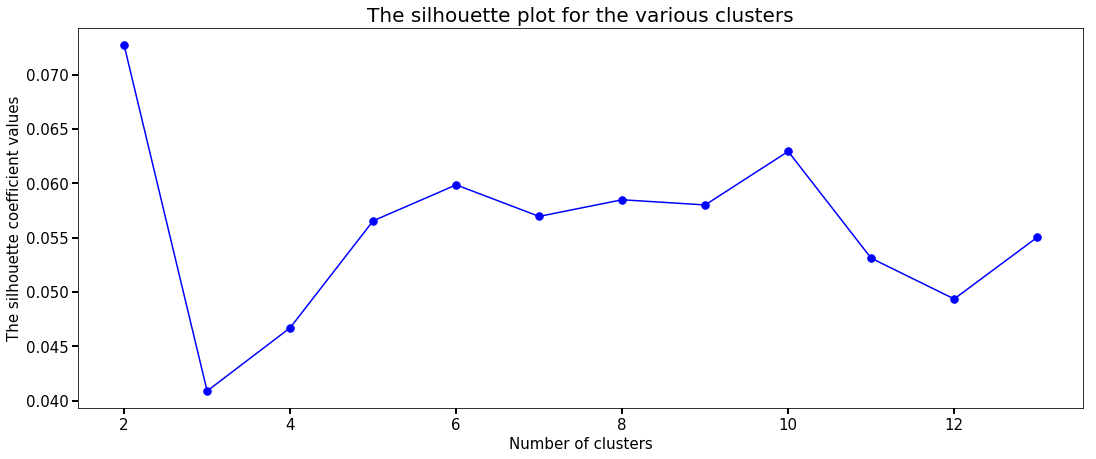

In [3]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

#### Approach II. Drop all the categorical values and impute the numerical values with means, the method will be applied on three parallel ramdonly generated subsamples (1.25%) of the original size data

In [4]:
# Use a smaller data set to save time
df1 = pd.read_csv('PHBsample14_sss.csv', low_memory=False)
df2 = pd.read_csv('PHBsample15_sss.csv', low_memory=False)
df3 = pd.read_csv('PHBsample16_sss.csv', low_memory=False)
# drop the column resulted from sampling of the original data set
df1.drop('Unnamed: 0', axis=1, inplace=True)
df2.drop('Unnamed: 0', axis=1, inplace=True)
df3.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
selected_variable = pd.read_csv('selectedVariables.csv')
selected_variable.drop('Unnamed: 0', axis=1, inplace=True)
df1_1 = df1[df1.columns.intersection(selected_variable.columns)]
df2_1 = df2[df2.columns.intersection(selected_variable.columns)]
df3_1 = df3[df3.columns.intersection(selected_variable.columns)]

In [7]:
# Drop all the categoricald data for now.
df1_2 = df1_1.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df1_3 = df1_2.fillna(df1_2.mean())
# Standarize the data points
X = StandardScaler().fit_transform(df1_3)

For n_clusters = 2 The average silhouette_score is : 0.04902706301226173


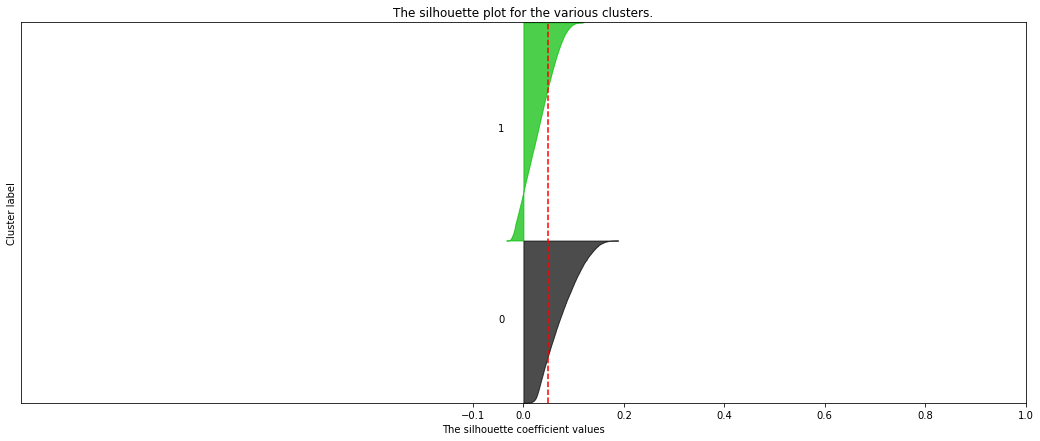

For n_clusters = 3 The average silhouette_score is : 0.037954594441643515


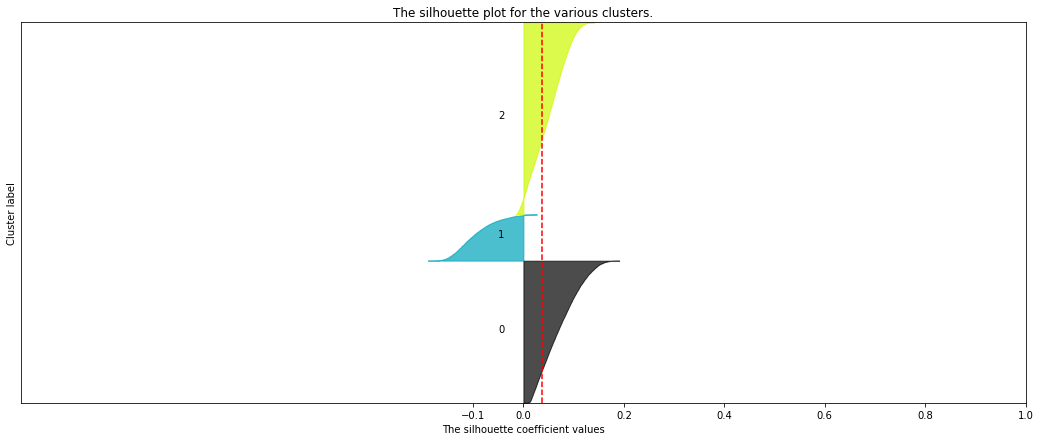

For n_clusters = 4 The average silhouette_score is : 0.015582511703659416


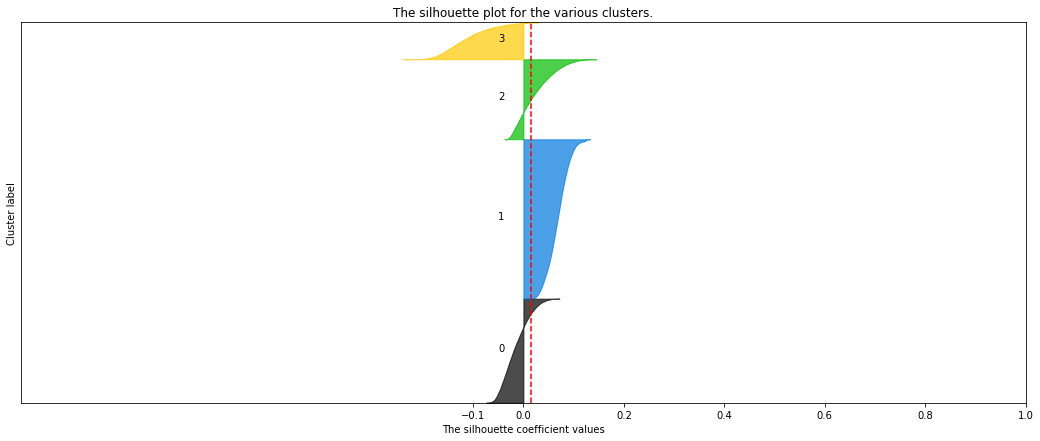

For n_clusters = 5 The average silhouette_score is : 0.014798856030805564


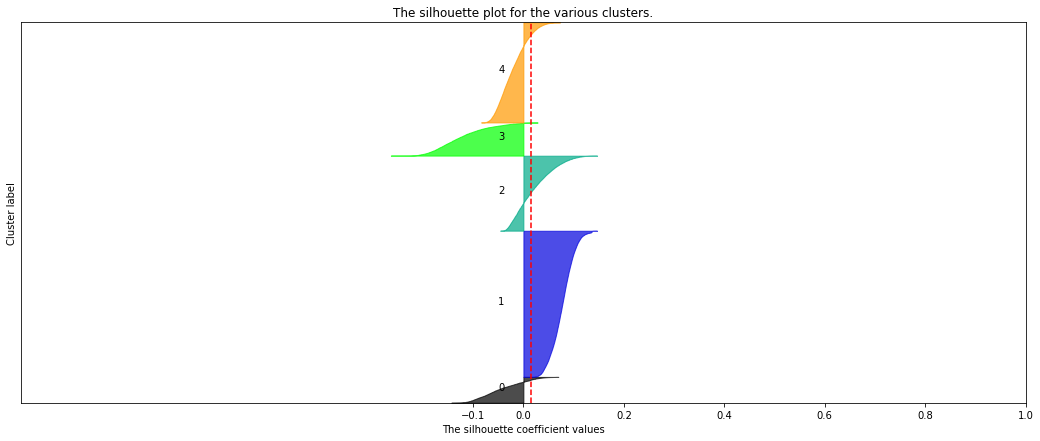

For n_clusters = 6 The average silhouette_score is : 0.010967829850565283


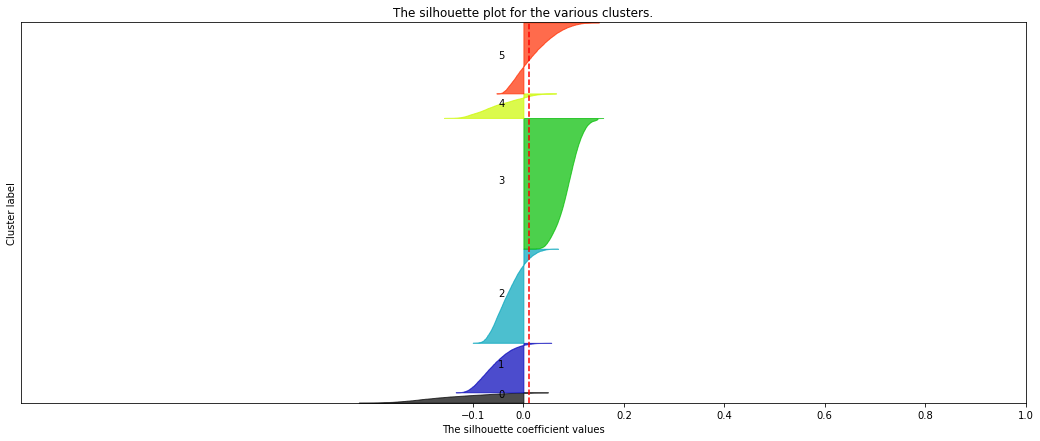

For n_clusters = 7 The average silhouette_score is : 0.005448385330352533


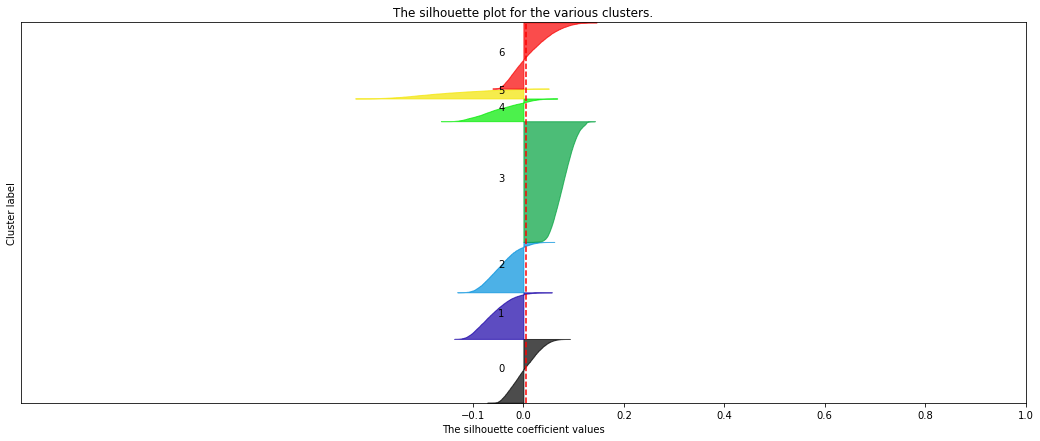

For n_clusters = 8 The average silhouette_score is : 0.006114136826697029


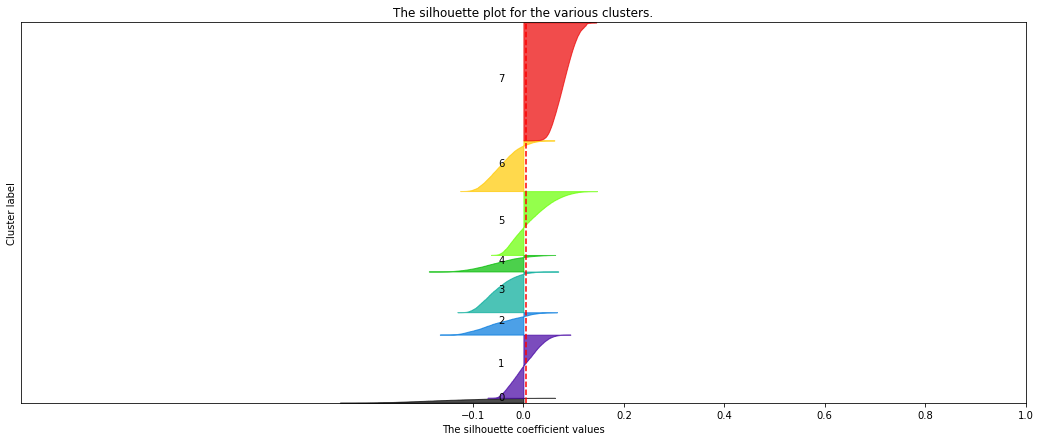

For n_clusters = 9 The average silhouette_score is : 0.004995598854874287


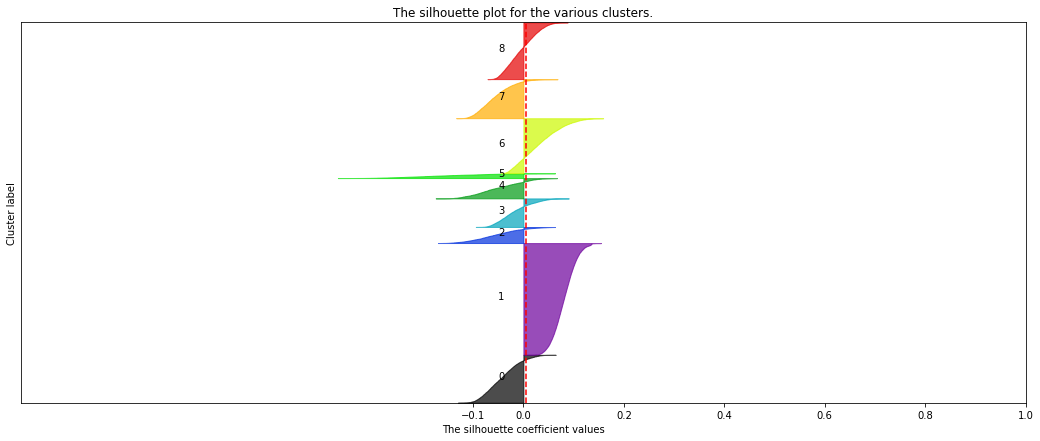

For n_clusters = 10 The average silhouette_score is : -0.0073324356762972985


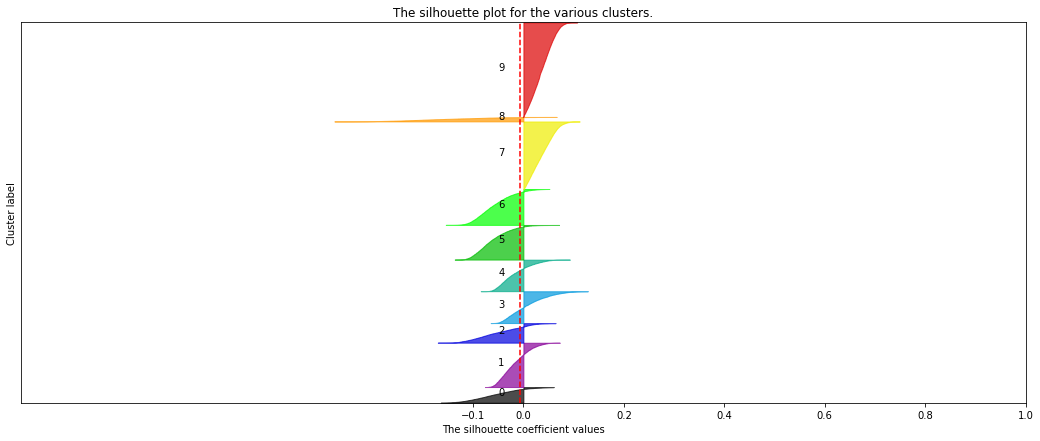

For n_clusters = 11 The average silhouette_score is : -0.0048675792059834026


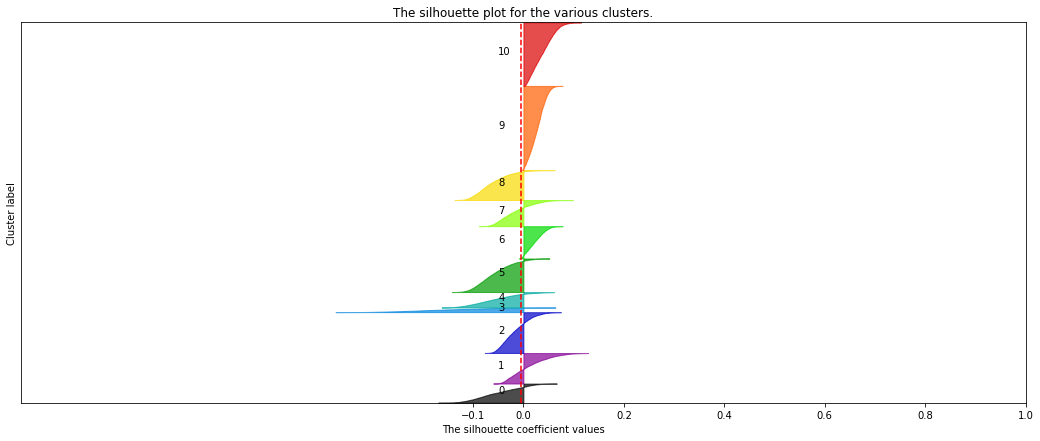

For n_clusters = 12 The average silhouette_score is : -0.009000557250107254


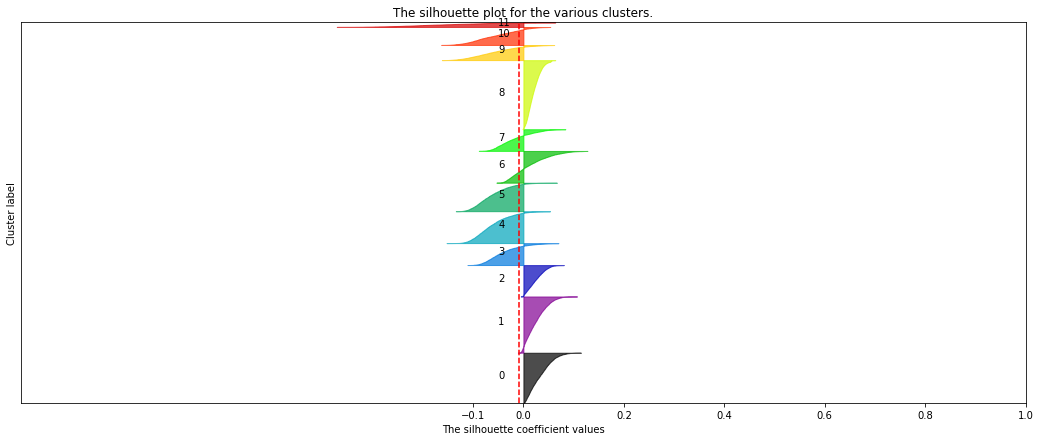

For n_clusters = 13 The average silhouette_score is : -0.00750432512991938


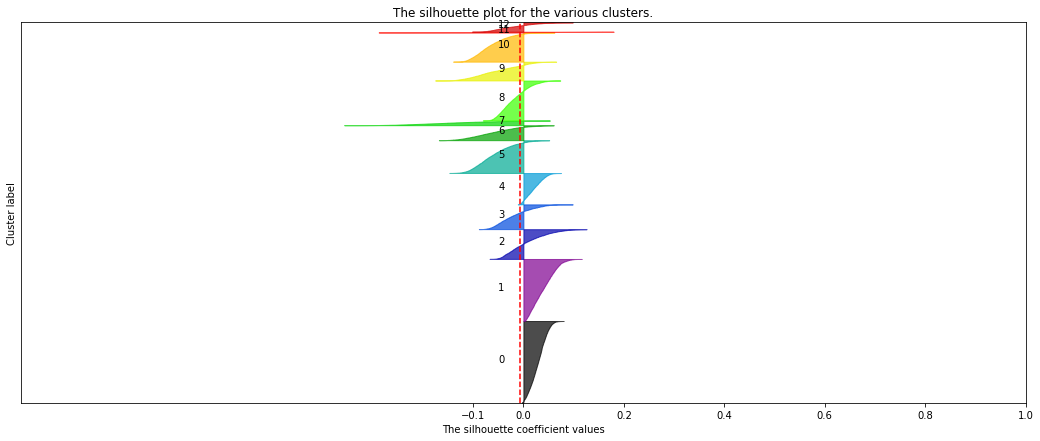

In [11]:
# Determine your k range
score = []
k_range = range(2,14)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

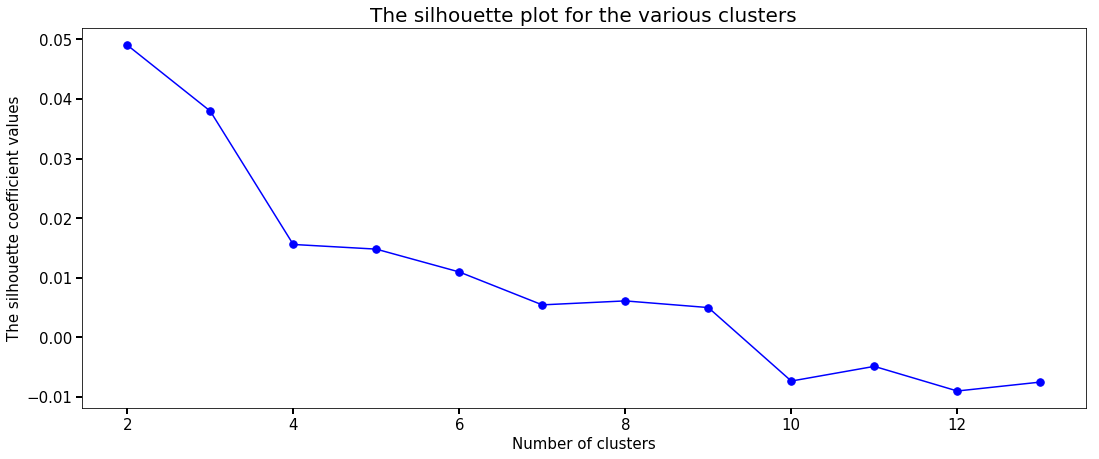

In [12]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

In [13]:
# Drop all the categoricald data for now.
df2_2 = df2_1.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df2_3 = df2_2.fillna(df2_2.mean())
# Standarize the data points
X = StandardScaler().fit_transform(df2_3)

In [15]:
# Determine your k range
score = []
k_range = range(2,14)

for n_clusters in k_range:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.05032008559666883
For n_clusters = 3 The average silhouette_score is : 0.037871704860788405
For n_clusters = 4 The average silhouette_score is : 0.018774756977043134
For n_clusters = 5 The average silhouette_score is : 0.014329174210957106
For n_clusters = 6 The average silhouette_score is : 0.009446515722551336
For n_clusters = 7 The average silhouette_score is : 0.008960529486810476
For n_clusters = 8 The average silhouette_score is : 0.006868475700101765
For n_clusters = 9 The average silhouette_score is : 0.010102085270494039
For n_clusters = 10 The average silhouette_score is : -0.008708038664290447
For n_clusters = 11 The average silhouette_score is : -0.005032711120545471
For n_clusters = 12 The average silhouette_score is : -0.008481176894724995
For n_clusters = 13 The average silhouette_score is : -0.010803184933287795


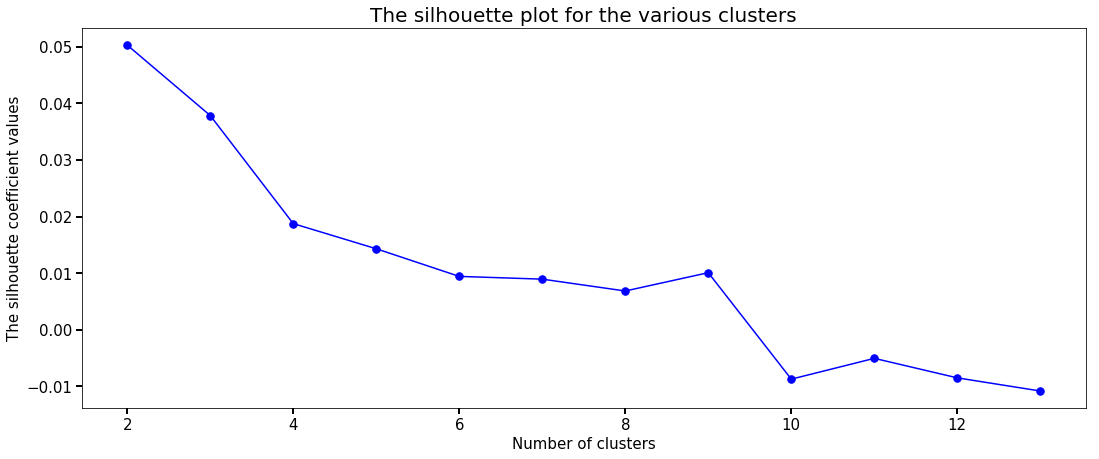

In [16]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

In [17]:
# Drop all the categoricald data for now.
df3_2 = df3_1.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df3_3 = df3_2.fillna(df3_2.mean())
# Standarize the data points
X = StandardScaler().fit_transform(df3_3)

In [18]:
# Determine your k range
score = []
k_range = range(2,14)

for n_clusters in k_range:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.05147103840196503
For n_clusters = 3 The average silhouette_score is : 0.040177921021609636
For n_clusters = 4 The average silhouette_score is : 0.017762856044127782
For n_clusters = 5 The average silhouette_score is : 0.015742544356484048
For n_clusters = 6 The average silhouette_score is : 0.012742600998323382
For n_clusters = 7 The average silhouette_score is : 0.010572318141552212
For n_clusters = 8 The average silhouette_score is : 0.009349376126186791
For n_clusters = 9 The average silhouette_score is : -0.004335649516901847
For n_clusters = 10 The average silhouette_score is : -0.007430112273391814
For n_clusters = 11 The average silhouette_score is : -0.008083663885203842
For n_clusters = 12 The average silhouette_score is : -0.0059598682030808535
For n_clusters = 13 The average silhouette_score is : -0.006990206033060425


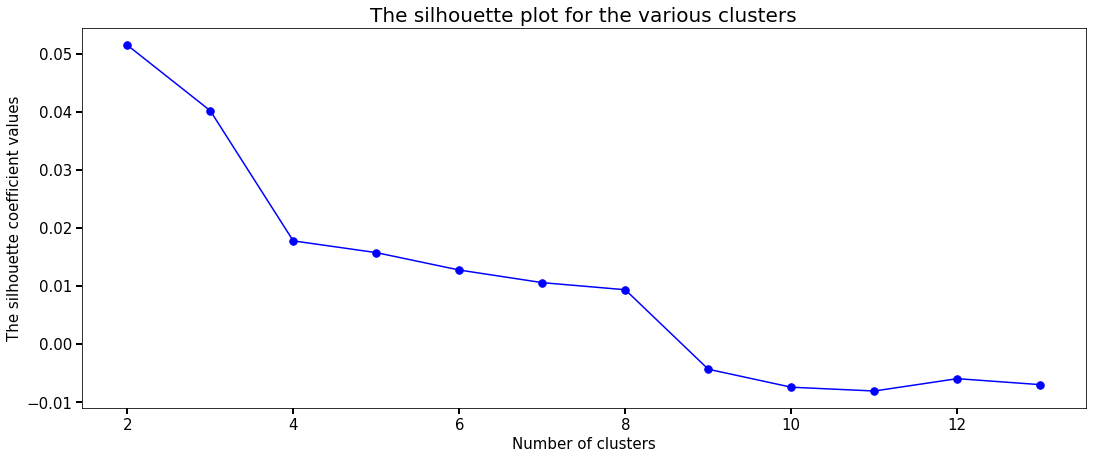

In [19]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')